In [1]:
import pandas as pd
import numpy as np
import glob
import os
import re
import scipy

import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

### load data

In [2]:
sub = '003'
ses = 'rbrevl'
task = 'ReferenceBack'

# df = pd.read_csv('../Trondheim_fMRI_data/derivatives/behavior/ses-{ses}/sub-{sub}_ses-{ses}_task-{task}_behavior.tsv').format(sub=sub, ses=ses, task=task)
df = pd.read_csv('../Trondheim_fMRI_data/derivatives/behavior/ses-'+ses+'/sub-'+sub+'_ses-'+ses+'_task-'+task+'_behavior.tsv', sep= '\t')
df.head()



,trial_nr,onset,event_type,phase,response,nr_frames,stimulus,color,WMstim,block_nr,...,choice_outcome,onset_abs,duration,gender,age,prev_color,switch,accuracy,trial_type,condition
0,0,6.396106,stimulus,1,NaN,120.0,O,red,O,1.0,...,NaN,81.310255,1.999510,NaN,NaN,NaN,switch,NaN,NaN,NaN
1,0,7.534006,response,1,r,NaN,O,red,O,1.0,...,NaN,82.448155,NaN,NaN,NaN,NaN,switch,NaN,response_left,NaN
2,1,10.445987,stimulus,1,NaN,120.0,X,red,O,1.0,...,NaN,85.360136,2.000409,NaN,NaN,red,repeat,True,RefRepDifferent,RefRepDifferent
3,1,11.311885,response,1,r,NaN,X,red,O,1.0,...,1.0,86.226033,NaN,NaN,NaN,red,repeat,True,response_left,RefRepDifferent
4,2,15.962554,stimulus,1,NaN,120.0,X,red,X,1.0,...,NaN,90.876703,2.003788,NaN,NaN,red,repeat,True,RefRepSame,RefRepSame


In [5]:
#filter out non-response events

In [3]:
df = df.loc[df.event_type == 'response']

In [6]:
df.head()

,trial_nr,onset,event_type,phase,response,nr_frames,stimulus,color,WMstim,block_nr,...,choice_outcome,onset_abs,duration,gender,age,prev_color,switch,accuracy,trial_type,condition
1,0,7.534006,response,1,r,NaN,O,red,O,1.0,...,NaN,82.448155,NaN,NaN,NaN,NaN,switch,NaN,response_left,NaN
3,1,11.311885,response,1,r,NaN,X,red,O,1.0,...,1.0,86.226033,NaN,NaN,NaN,red,repeat,True,response_left,RefRepDifferent
5,2,17.511325,response,1,b,NaN,X,red,X,1.0,...,1.0,92.425474,NaN,NaN,NaN,red,repeat,True,response_right,RefRepSame
7,3,24.346090,response,1,b,NaN,X,blue,X,1.0,...,1.0,99.260239,NaN,NaN,NaN,red,switch,True,response_right,ComSwiSame
9,4,27.516372,response,1,b,NaN,X,blue,X,1.0,...,1.0,102.430520,NaN,NaN,NaN,blue,repeat,True,response_right,ComRepSame


In [9]:
#make sub column

In [7]:
df['sub'] = sub

In [8]:
pd.set_option('display.max_columns', None)
df.tail()

,trial_nr,onset,event_type,phase,response,nr_frames,stimulus,color,WMstim,block_nr,n_trs,rt,choice_key,choice_direction,choice_outcome,onset_abs,duration,gender,age,prev_color,switch,accuracy,trial_type,condition,sub
505,253,762.685659,response,1,b,NaN,O,blue,O,2.0,NaN,0.786551,b,1.0,1.0,1759.412650,NaN,NaN,NaN,red,switch,True,response_right,ComSwiSame,003
507,254,768.349290,response,1,r,NaN,X,red,O,2.0,NaN,0.916963,r,0.0,1.0,1765.076280,NaN,NaN,NaN,blue,switch,True,response_left,RefSwiDifferent,003
509,255,774.130800,response,1,b,NaN,O,red,X,2.0,NaN,0.431967,b,1.0,0.0,1770.857791,NaN,NaN,NaN,red,repeat,False,response_right,RefRepDifferent,003
511,256,778.232882,response,1,b,NaN,O,blue,O,2.0,NaN,0.517433,b,1.0,1.0,1774.959873,NaN,NaN,NaN,red,switch,True,response_right,ComSwiSame,003
513,257,784.247793,response,1,r,NaN,X,red,O,2.0,NaN,1.015790,r,0.0,1.0,1780.974784,NaN,NaN,NaN,blue,switch,True,response_left,RefSwiDifferent,003


### reindex and make some new variables


In [10]:
data = df.reindex(columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'trial_type', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'choice_outcome', 'accuracy' ])
data = data.rename(columns={'trial_type': 'response_dir'})
data = data.rename(columns={'response': 'response_key'})

data['match'] = np.nan
data.loc[(data['stimulus'] == data['WMstim']) , 'match'] = 'match'
data.loc[(data['stimulus'] != data['WMstim']) , 'match'] = 'mismatch'

data['response'] = np.nan
data.loc[(data['response_key'] == 'b') , 'response'] = 'same'
data.loc[(data['response_key'] == 'r') , 'response'] = 'different'

#data.loc[(data['response_key'] =='r') , 'match'] = 'mismatch'

data = data.reindex(columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'match', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'choice_outcome', 'accuracy', 'response_dir', 'response_key' ])



In [11]:
data.tail()

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,choice_outcome,accuracy,response_dir,response_key
505,003,2.0,253,ComSwiSame,same,match,O,blue,O,red,switch,0.786551,1.0,True,response_right,b
507,003,2.0,254,RefSwiDifferent,different,mismatch,X,red,O,blue,switch,0.916963,1.0,True,response_left,r
509,003,2.0,255,RefRepDifferent,same,mismatch,O,red,X,red,repeat,0.431967,0.0,False,response_right,b
511,003,2.0,256,ComSwiSame,same,match,O,blue,O,red,switch,0.517433,1.0,True,response_right,b
513,003,2.0,257,RefSwiDifferent,different,mismatch,X,red,O,blue,switch,1.015790,1.0,True,response_left,r


In [16]:
import re

all_files = sorted(glob.glob('../Trondheim_fMRI_data/derivatives/behavior/ses-*/sub-*.tsv'))

#all_files

regex = re.compile('.*sub-(?P<sub>\d+)')

all_files_dict = [regex.match(x).groupdict() for x in all_files]
all_files_df = pd.DataFrame.from_dict(all_files_dict).sort_values(['sub']).drop_duplicates()

subjects = list(all_files_df['sub'])
subjects


['002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '023',
 '024',
 '025',
 '026',
 '027',
 '029',
 '031',
 '032',
 '033',
 '034',
 '035',
 '037',
 '038',
 '039',
 '041',
 '042',
 '043',
 '044']

### How many trials per subject? (No responses are excluded in this dataframe)

    <230 (10%) trials: 

    sub-009 = 164
    sub-013 = 218


    < 243 (5%):

    sub-009 = 164
    sub-013 = 218
    sub-011 = 235
    sub-027 = 236
    sub-043 = 230

In [143]:
data[['trial_nr','sub']].groupby('sub').count()

,trial_nr
sub,
2,243
3,256
4,254
5,255
6,256
7,256
8,252
9,164
10,256


### mean accuracy rates

In [36]:
data[['correct', 'sub']].groupby('sub').mean()

,correct
sub,
2,0.966942
3,0.850980
4,0.901575
5,0.917647
6,0.980469
7,0.972656
8,0.984127
9,0.884146
10,0.988281


## concatenate all new dataframes 

--> ReferenceBack_data_N35.csv


without subjects 
sub-009 (only 164 valid responses)
sub-013  (218 and low accuracy of 63%)


In [23]:
subjects.remove('009')

In [24]:
subjects.remove('013')

In [25]:
subjects

['002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '010',
 '011',
 '012',
 '014',
 '015',
 '016',
 '017',
 '018',
 '019',
 '020',
 '023',
 '024',
 '025',
 '026',
 '027',
 '029',
 '031',
 '032',
 '033',
 '034',
 '035',
 '037',
 '038',
 '039',
 '041',
 '042',
 '043',
 '044']

In [26]:
from multiprocessing import Pool
import itertools



#sub = '003'
ses = 'rbrevl'
task = 'ReferenceBack'
dframes = list()
#print(type(dframes))
# def concat_data(subjects):
#     sub = subjects

for sub in subjects:
    print(sub)
#     ses = 'rbrevl'
#     task = 'ReferenceBack'
        
#     d = pd.DataFrame(None, columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'match', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'choice_outcome', 'accuracy', 'response_dir', 'response_key' ])

    
    df = pd.read_csv('../Trondheim_fMRI_data/derivatives/behavior/ses-'+ses+'/sub-'+sub+'_ses-'+ses+'_task-'+task+'_behavior.tsv', sep= '\t')
   # print(df.head())
    df = df.loc[df.event_type == 'response']
    
    
    df['sub'] = sub
    data = df.reindex(columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'trial_type', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'choice_outcome', 'accuracy' ])
    data = data.rename(columns={'trial_type': 'response_dir'})
    data = data.rename(columns={'response': 'response_key'})
    data = data.rename(columns={'choice_outcome': 'correct'})


    data['match'] = np.nan
    data.loc[(data['stimulus'] == data['WMstim']) , 'match'] = 'match'
    data.loc[(data['stimulus'] != data['WMstim']) , 'match'] = 'mismatch'

    data['response'] = np.nan
    data.loc[(data['response_key'] == 'b') , 'response'] = 'same'
    data.loc[(data['response_key'] == 'r') , 'response'] = 'different'
    #
   # print(data.head())

    #print('data_'+str(i))
    df_label = 'data_'+str(sub)
    print(df_label)
    
    df_label = data.reindex(columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'match', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'correct', 'accuracy', 'response_dir', 'response_key' ])
   #print(df_label.head())
    dframes.append(df_label)
    
    #print(dframes)
final_data = pd.concat(dframes)
print(final_data)
final_data.to_csv('../Trondheim_fMRI_data/derivatives/behavior/ses-rbrevl/'+task+'_data_N35.csv', sep=',', index=False)




002
data_002
003
data_003
004
data_004
005
data_005
006
data_006
007
data_007
008
data_008
010
data_010
011
data_011
012
data_012
014
data_014
015
data_015
016
data_016
017
data_017
018
data_018
019
data_019
020
data_020
023
data_023
024
data_024
025
data_025
026
data_026
027
data_027
029
data_029
031
data_031
032
data_032
033
data_033
034
data_034
035
data_035
037
data_037
038
data_038
039
data_039
041
data_041
042
data_042
043
data_043
044
data_044
     sub  block_nr  trial_nr        condition   response     match stimulus  \
1    002       1.0         0              NaN       same     match        X   
3    002       1.0         1  RefRepDifferent  different  mismatch        O   
5    002       1.0         2       ComSwiSame       same     match        O   
7    002       1.0         3  ComRepDifferent  different  mismatch        X   
9    002       1.0         4  ComRepDifferent  different  mismatch        X   
..   ...       ...       ...              ...        ...       ...     

In [ ]:
# from multiprocessing import Pool
# import itertools



# #sub = '003'
# ses = 'rbrevl'
# task = 'ReferenceBack'
# dframes = list()
# #print(type(dframes))
# # def concat_data(subjects):
# #     sub = subjects

# for sub in subjects:
#     print(sub)
# #     ses = 'rbrevl'
# #     task = 'ReferenceBack'
        
# #     d = pd.DataFrame(None, columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'match', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'choice_outcome', 'accuracy', 'response_dir', 'response_key' ])

    
#     df = pd.read_csv('../Trondheim_fMRI_data/derivatives/behavior/ses-'+ses+'/sub-'+sub+'_ses-'+ses+'_task-'+task+'_behavior.tsv', sep= '\t')
#    # print(df.head())
#     df = df.loc[df.event_type == 'response']
    
    
#     df['sub'] = sub
#     data = df.reindex(columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'trial_type', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'choice_outcome', 'accuracy' ])
#     data = data.rename(columns={'trial_type': 'response_dir'})
#     data = data.rename(columns={'response': 'response_key'})
#     data = data.rename(columns={'choice_outcome': 'correct'})


#     data['match'] = np.nan
#     data.loc[(data['stimulus'] == data['WMstim']) , 'match'] = 'match'
#     data.loc[(data['stimulus'] != data['WMstim']) , 'match'] = 'mismatch'

#     data['response'] = np.nan
#     data.loc[(data['response_key'] == 'b') , 'response'] = 'same'
#     data.loc[(data['response_key'] == 'r') , 'response'] = 'different'
#     #
#    # print(data.head())
    
    

#     #print('data_'+str(i))
# #     df_label = 'data_'+str(sub)
# #     print(df_label)
    
    
# #     df_label = data.reindex(columns = ['sub', 'block_nr', 'trial_nr', 'condition', 'response', 'match', 'stimulus', 'color', 'WMstim', 'prev_color', 'switch','rt', 'correct', 'accuracy', 'response_dir', 'response_key' ])
# #    #print(df_label.head())
# #     dframes.append(df_label)
    
    
#     #print(dframes)
# #final_data = pd.concat(dframes)
# #print(final_data)
# #final_data.to_csv('../Trondheim_fMRI_data/derivatives/behavior/ses-rbrevl/'+task+'_data_N37.csv', sep=',', index=False)




In [27]:
data = pd.read_csv('../Trondheim_fMRI_data/derivatives/behavior/ses-rbrevl/ReferenceBack_data_N35.csv')
data.head()

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,correct,accuracy,response_dir,response_key
0,2,1.0,0,NaN,same,match,X,red,X,NaN,switch,0.747023,NaN,NaN,response_right,b
1,2,1.0,1,RefRepDifferent,different,mismatch,O,red,X,red,repeat,0.953210,1.0,True,response_left,r
2,2,1.0,2,ComSwiSame,same,match,O,blue,O,red,switch,0.935576,1.0,True,response_right,b
3,2,1.0,3,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.817226,1.0,True,response_left,r
4,2,1.0,4,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.801787,1.0,True,response_left,r


In [28]:
data.tail()

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,correct,accuracy,response_dir,response_key
8806,44,2.0,253,ComSwiSame,same,match,O,blue,O,red,switch,0.518275,1.0,True,response_right,b
8807,44,2.0,254,RefSwiSame,same,match,O,red,O,blue,switch,0.451086,1.0,True,response_right,b
8808,44,2.0,255,RefRepDifferent,different,mismatch,X,red,O,red,repeat,0.766274,1.0,True,response_left,r
8809,44,2.0,256,RefRepDifferent,same,mismatch,O,red,X,red,repeat,0.982823,0.0,False,response_right,b
8810,44,2.0,257,RefRepDifferent,different,mismatch,X,red,O,red,repeat,0.837645,1.0,True,response_left,r


In [30]:
# data[120:]

In [31]:
# data.describe(level = 'sub')

# data.mean(axis='columns')

#data.loc[data['sub'] == sub, 'correct'].mean()
data['sub'] = data['sub'].astype(int)



### overall accuracy rate (after removal of non-responses)

In [32]:
data[['correct']].mean()

correct    0.94683
dtype: float64

In [33]:
# y = data[['correct', 'sub']].groupby('sub').mean()
# hist(y, density= True)

### overall mean RT 


In [34]:
data[['rt']].mean()

rt    0.860666
dtype: float64

In [36]:
x = data['rt']

In [37]:
x

0       0.747023
1       0.953210
2       0.935576
3       0.817226
4       0.801787
          ...   
8806    0.518275
8807    0.451086
8808    0.766274
8809    0.982823
8810    0.837645
Name: rt, Length: 8811, dtype: float64

### exclusion of slow and fast responses?

    Boag et al. (2021) 
    We excluded the first trial from each block (which did not require a response) and excluded RTs faster than 150 ms and slower than 3 s as outliers (~1% of the data).
    
    ---> we do not have such premature responses

In [38]:
min(x)

0.2695472880004672

In [39]:
max(x)

1.9872030189726504

(array([ 127., 1324., 2775., 2044., 1119.,  683.,  379.,  188.,  110.,
          62.]),
 array([0.26954729, 0.44131286, 0.61307843, 0.78484401, 0.95660958,
        1.12837515, 1.30014073, 1.4719063 , 1.64367187, 1.81543745,
        1.98720302]),
 <a list of 10 Patch objects>)

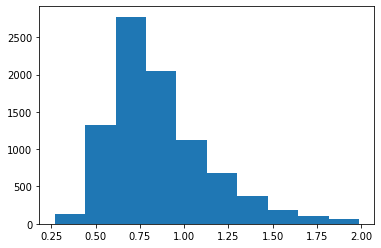

In [40]:
from matplotlib.pyplot import hist

hist(x)

In [30]:
type(data['sub'])

pandas.core.series.Series

### remove first trials from each run

In [41]:
data = data[(data.trial_nr != 0)] #
data = data[(data.trial_nr != 129)] #

In [42]:
data.head()

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,correct,accuracy,response_dir,response_key
1,2,1.0,1,RefRepDifferent,different,mismatch,O,red,X,red,repeat,0.953210,1.0,True,response_left,r
2,2,1.0,2,ComSwiSame,same,match,O,blue,O,red,switch,0.935576,1.0,True,response_right,b
3,2,1.0,3,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.817226,1.0,True,response_left,r
4,2,1.0,4,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.801787,1.0,True,response_left,r
5,2,1.0,5,RefSwiSame,same,match,O,red,O,blue,switch,1.068541,1.0,True,response_right,b


In [43]:
data.condition.unique()

array(['RefRepDifferent', 'ComSwiSame', 'ComRepDifferent', 'RefSwiSame',
       'ComSwiDifferent', 'ComRepSame', 'RefSwiDifferent', 'RefRepSame'],
      dtype=object)

### get descriptives of RT and accuracy data

In [44]:
data[['correct', 'rt', 'condition']].groupby('condition').mean().round(3)

,correct,rt
condition,,
ComRepDifferent,0.937,0.865
ComRepSame,0.931,0.793
ComSwiDifferent,0.964,0.896
ComSwiSame,0.962,0.768
RefRepDifferent,0.953,0.958
RefRepSame,0.972,0.759
RefSwiDifferent,0.910,1.014
RefSwiSame,0.946,0.833


In [45]:
data[['correct', 'rt', 'condition']].groupby('condition').std().round(3)

,correct,rt
condition,,
ComRepDifferent,0.243,0.259
ComRepSame,0.254,0.279
ComSwiDifferent,0.187,0.259
ComSwiSame,0.191,0.228
RefRepDifferent,0.212,0.274
RefRepSame,0.165,0.251
RefSwiDifferent,0.286,0.291
RefSwiSame,0.227,0.297


In [46]:
#same as above 
data[['color', 'switch', 'match', 'rt', 'correct']].groupby(['color', 'switch', 'match']).mean().round(3)

rt  correct
color switch match                   
blue  repeat match     0.793    0.931
             mismatch  0.865    0.937
      switch match     0.768    0.962
             mismatch  0.896    0.964
red   repeat match     0.759    0.972
             mismatch  0.958    0.953
      switch match     0.833    0.946
             mismatch  1.014    0.910

In [47]:
data[['color', 'switch', 'match', 'rt', 'correct']].groupby(['color', 'switch', 'match']).std().round(3)

rt  correct
color switch match                   
blue  repeat match     0.279    0.254
             mismatch  0.259    0.243
      switch match     0.228    0.191
             mismatch  0.259    0.187
red   repeat match     0.251    0.165
             mismatch  0.274    0.212
      switch match     0.297    0.227
             mismatch  0.291    0.286

In [48]:
# make another dataframe for ANOVAS (but we don't actually run ANOVAS, so this can be skipped)

In [49]:
df = data[['sub','color', 'switch', 'match', 'rt', 'correct']].groupby(['sub','color', 'switch', 'match']).mean().round(3)

In [50]:
df

rt  correct
sub color switch match                   
2   blue  repeat match     0.808    0.900
                 mismatch  0.919    0.963
          switch match     0.835    1.000
                 mismatch  0.977    1.000
    red   repeat match     0.824    0.935
...                          ...      ...
44  blue  switch mismatch  0.698    1.000
    red   repeat match     0.528    1.000
                 mismatch  0.767    0.969
          switch match     0.534    1.000
                 mismatch  0.805    0.969

[280 rows x 2 columns]

In [51]:
df.reset_index(inplace=True)


In [52]:
df 

,sub,color,switch,match,rt,correct
0,2,blue,repeat,match,0.808,0.900
1,2,blue,repeat,mismatch,0.919,0.963
2,2,blue,switch,match,0.835,1.000
3,2,blue,switch,mismatch,0.977,1.000
4,2,red,repeat,match,0.824,0.935
...,...,...,...,...,...,...
275,44,blue,switch,mismatch,0.698,1.000
276,44,red,repeat,match,0.528,1.000
277,44,red,repeat,mismatch,0.767,0.969
278,44,red,switch,match,0.534,1.000


In [55]:
# df= df.drop(['level_0', 'index'], axis = 1)

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols




model = ols("""rt ~ C(color) + C(switch) + C(match) + C(color) : C(switch) + C(match) : C(color)+ C(switch):C(match) + C(color): C(switch):C(match)""", data = df).fit()

In [57]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(color),0.266791,1.0,13.360949,3.082965e-04
C(switch),0.084599,1.0,4.236732,4.051077e-02
C(match),1.480027,1.0,74.120073,6.022752e-16
C(color):C(switch),0.073063,1.0,3.658992,5.681737e-02
C(match):C(color),0.144145,1.0,7.218816,7.658548e-03
C(switch):C(match),0.007334,1.0,0.367283,5.449945e-01
C(color):C(switch):C(match),0.024572,1.0,1.230566,2.682768e-01
Residual,5.431285,272.0,NaN,NaN


In [58]:
# data.head()

In [59]:
dat = data

In [60]:
dat['Trial type'] = dat['color']
dat.loc[dat['color'] == 'red', 'Trial type'] = 'Reference'
dat.loc[dat['color'] == 'blue', 'Trial type'] = 'Comparison'

dat

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,correct,accuracy,response_dir,response_key,Trial type
1,2,1.0,1,RefRepDifferent,different,mismatch,O,red,X,red,repeat,0.953210,1.0,True,response_left,r,Reference
2,2,1.0,2,ComSwiSame,same,match,O,blue,O,red,switch,0.935576,1.0,True,response_right,b,Comparison
3,2,1.0,3,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.817226,1.0,True,response_left,r,Comparison
4,2,1.0,4,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.801787,1.0,True,response_left,r,Comparison
5,2,1.0,5,RefSwiSame,same,match,O,red,O,blue,switch,1.068541,1.0,True,response_right,b,Reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,44,2.0,253,ComSwiSame,same,match,O,blue,O,red,switch,0.518275,1.0,True,response_right,b,Comparison
8807,44,2.0,254,RefSwiSame,same,match,O,red,O,blue,switch,0.451086,1.0,True,response_right,b,Reference
8808,44,2.0,255,RefRepDifferent,different,mismatch,X,red,O,red,repeat,0.766274,1.0,True,response_left,r,Reference
8809,44,2.0,256,RefRepDifferent,same,mismatch,O,red,X,red,repeat,0.982823,0.0,False,response_right,b,Reference


In [61]:
dat['Stimulus'] = dat['match']
# dat.loc[dat['match'] == 'match', 'Stimulus'] = 'Reference'
# dat.loc[dat['match'] == 'mismatch', 'Stimulus'] = 'Comparison'
dat

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,correct,accuracy,response_dir,response_key,Trial type,Stimulus
1,2,1.0,1,RefRepDifferent,different,mismatch,O,red,X,red,repeat,0.953210,1.0,True,response_left,r,Reference,mismatch
2,2,1.0,2,ComSwiSame,same,match,O,blue,O,red,switch,0.935576,1.0,True,response_right,b,Comparison,match
3,2,1.0,3,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.817226,1.0,True,response_left,r,Comparison,mismatch
4,2,1.0,4,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.801787,1.0,True,response_left,r,Comparison,mismatch
5,2,1.0,5,RefSwiSame,same,match,O,red,O,blue,switch,1.068541,1.0,True,response_right,b,Reference,match
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,44,2.0,253,ComSwiSame,same,match,O,blue,O,red,switch,0.518275,1.0,True,response_right,b,Comparison,match
8807,44,2.0,254,RefSwiSame,same,match,O,red,O,blue,switch,0.451086,1.0,True,response_right,b,Reference,match
8808,44,2.0,255,RefRepDifferent,different,mismatch,X,red,O,red,repeat,0.766274,1.0,True,response_left,r,Reference,mismatch
8809,44,2.0,256,RefRepDifferent,same,mismatch,O,red,X,red,repeat,0.982823,0.0,False,response_right,b,Reference,mismatch


In [62]:
dat['PE'] = dat['correct']
dat.loc[dat['correct'] == 1.0, 'PE'] = 0
dat.loc[dat['correct'] == 0, 'PE'] = 1
dat

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,correct,accuracy,response_dir,response_key,Trial type,Stimulus,PE
1,2,1.0,1,RefRepDifferent,different,mismatch,O,red,X,red,repeat,0.953210,1.0,True,response_left,r,Reference,mismatch,0.0
2,2,1.0,2,ComSwiSame,same,match,O,blue,O,red,switch,0.935576,1.0,True,response_right,b,Comparison,match,0.0
3,2,1.0,3,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.817226,1.0,True,response_left,r,Comparison,mismatch,0.0
4,2,1.0,4,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.801787,1.0,True,response_left,r,Comparison,mismatch,0.0
5,2,1.0,5,RefSwiSame,same,match,O,red,O,blue,switch,1.068541,1.0,True,response_right,b,Reference,match,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,44,2.0,253,ComSwiSame,same,match,O,blue,O,red,switch,0.518275,1.0,True,response_right,b,Comparison,match,0.0
8807,44,2.0,254,RefSwiSame,same,match,O,red,O,blue,switch,0.451086,1.0,True,response_right,b,Reference,match,0.0
8808,44,2.0,255,RefRepDifferent,different,mismatch,X,red,O,red,repeat,0.766274,1.0,True,response_left,r,Reference,mismatch,0.0
8809,44,2.0,256,RefRepDifferent,same,mismatch,O,red,X,red,repeat,0.982823,0.0,False,response_right,b,Reference,mismatch,1.0


In [63]:
dat['updating'] = dat['color']
dat.loc[dat['color'] == 'red', 'updating'] = 'reference'
dat.loc[dat['color'] == 'blue', 'updating'] = 'comparison'
dat

,sub,block_nr,trial_nr,condition,response,match,stimulus,color,WMstim,prev_color,switch,rt,correct,accuracy,response_dir,response_key,Trial type,Stimulus,PE,updating
1,2,1.0,1,RefRepDifferent,different,mismatch,O,red,X,red,repeat,0.953210,1.0,True,response_left,r,Reference,mismatch,0.0,reference
2,2,1.0,2,ComSwiSame,same,match,O,blue,O,red,switch,0.935576,1.0,True,response_right,b,Comparison,match,0.0,comparison
3,2,1.0,3,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.817226,1.0,True,response_left,r,Comparison,mismatch,0.0,comparison
4,2,1.0,4,ComRepDifferent,different,mismatch,X,blue,O,blue,repeat,0.801787,1.0,True,response_left,r,Comparison,mismatch,0.0,comparison
5,2,1.0,5,RefSwiSame,same,match,O,red,O,blue,switch,1.068541,1.0,True,response_right,b,Reference,match,0.0,reference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,44,2.0,253,ComSwiSame,same,match,O,blue,O,red,switch,0.518275,1.0,True,response_right,b,Comparison,match,0.0,comparison
8807,44,2.0,254,RefSwiSame,same,match,O,red,O,blue,switch,0.451086,1.0,True,response_right,b,Reference,match,0.0,reference
8808,44,2.0,255,RefRepDifferent,different,mismatch,X,red,O,red,repeat,0.766274,1.0,True,response_left,r,Reference,mismatch,0.0,reference
8809,44,2.0,256,RefRepDifferent,same,mismatch,O,red,X,red,repeat,0.982823,0.0,False,response_right,b,Reference,mismatch,1.0,reference


In [64]:
dat.to_csv('../Trondheim_fMRI_data/derivatives/behavior/ReferenceBack_data_N35_edited.csv')

### interaction plot 

with bootstrapped 95% confidence intervals

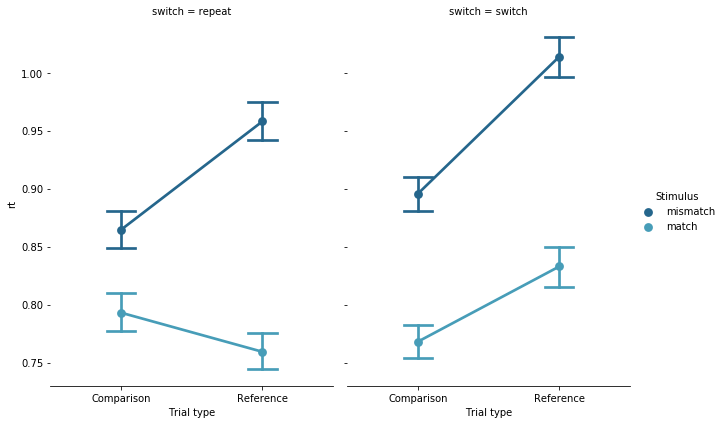

In [65]:
import seaborn as sns

g = sns.catplot(x="Trial type", y="rt", hue="Stimulus", col="switch", order = ['Comparison','Reference'],
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=dat)
g.despine(left=True)

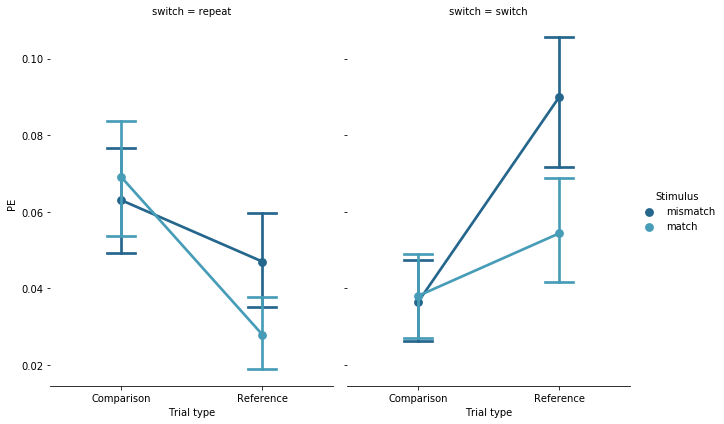

In [66]:
import seaborn as sns

g = sns.catplot(x="Trial type", y="PE", hue="Stimulus", col="switch", order = ['Comparison','Reference'],
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=data)
g.despine(left=True)

In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols




model_acc = ols("""correct ~ C(color) + C(switch) + C(match) + C(color) : C(switch) + C(match) : C(color)+ C(switch):C(match) + C(color): C(switch):C(match)""", data = df).fit()

In [68]:
sm.stats.anova_lm(model_acc, typ=2)

,sum_sq,df,F,PR(>F)
C(color),0.000704,1.0,0.164609,0.685267
C(switch),0.000654,1.0,0.152959,0.696029
C(match),0.009582,1.0,2.240350,0.135610
C(color):C(switch),0.074916,1.0,17.515362,0.000039
C(match):C(color),0.017254,1.0,4.034071,0.045579
C(switch):C(match),0.002118,1.0,0.495073,0.482275
C(color):C(switch):C(match),0.000589,1.0,0.137639,0.710929
Residual,1.163383,272.0,NaN,NaN


In [ ]:
# that's wrong! no subject effect required

# model = ols("""rt ~ C(sub) + C(color) + C (switch) + C(match) + C(sub) : C(color) +  C(sub) : C(switch) + C(sub) : C(match) + C(sub) : C(color): C(switch):C(match)""", data = data).fit()

In [97]:
# sm.stats.anova_lm(model, typ=2)


# 1) With removal of error trials 

but including post-error trials 

In [69]:
# get means for plot1

# for each sub
rt_RefSwi = data.loc[(data.color=='red')& (data.switch == 'switch') & (data.correct == 1.0) , ['sub','rt']]
rt_RefSwi = rt_RefSwi.pivot_table(index = 'sub', values = 'rt')

rt_RefRep = data.loc[(data.color=='red')& (data.switch == 'repeat') & (data.correct == 1.0), ['sub','rt']]
rt_RefRep = rt_RefRep.pivot_table(index = 'sub', values = 'rt')

rt_ComSwi = data.loc[(data.color=='blue')& (data.switch == 'switch') & (data.correct == 1.0) ,['sub','rt']]
rt_ComSwi= rt_ComSwi.pivot_table(index = 'sub', values = 'rt')

rt_ComRep = data.loc[(data.color=='blue')& (data.switch == 'repeat') & (data.correct == 1.0) , ['sub','rt']]
rt_ComRep= rt_ComRep.pivot_table(index = 'sub', values = 'rt')

# make new df
df_plot1 = pd.DataFrame(rt_RefSwi)#, columns= 'rt_RefSwi')
df_plot1 =df_plot1.rename(columns= {'rt': 'rt_RefSwi'})

df_plot1['rt_RefRep'] = rt_RefRep
df_plot1['rt_ComSwi'] = rt_ComSwi
df_plot1['rt_ComRep'] = rt_ComRep
df_plot1

#compute mean across subjects and conditions

means_df_plot1 = df_plot1.mean()
df_rt = pd.DataFrame(means_df_plot1)
df_rt

,0
rt_RefSwi,0.914081
rt_RefRep,0.855107
rt_ComSwi,0.828388
rt_ComRep,0.821899


In [70]:
sem_df_plot1 = df_plot1.sem()
df_rt_sem = pd.DataFrame(sem_df_plot1)
df_rt_sem

,0
rt_RefSwi,0.026003
rt_RefRep,0.021062
rt_ComSwi,0.019362
rt_ComRep,0.021474


In [71]:
means_df_plot1[1::2]

rt_RefRep    0.855107
rt_ComRep    0.821899
dtype: float64

In [72]:
sem_df_plot1[1::2]

rt_RefRep    0.021062
rt_ComRep    0.021474
dtype: float64

In [73]:
# get means for plot2

# for each sub
rt_RefSame = data.loc[(data.color=='red')& (data.response == 'same') & (data.correct == 1.0) , ['sub','rt']]
rt_RefSame = rt_RefSame.pivot_table(index = 'sub', values = 'rt')

rt_RefDiff = data.loc[(data.color=='red')& (data.response == 'different') & (data.correct == 1.0), ['sub','rt']]
rt_RefDiff = rt_RefDiff.pivot_table(index = 'sub', values = 'rt')

rt_ComSame = data.loc[(data.color=='blue')& (data.response == 'same') & (data.correct == 1.0) ,['sub','rt']]
rt_ComSame= rt_ComSame.pivot_table(index = 'sub', values = 'rt')

rt_ComDiff = data.loc[(data.color=='blue')& (data.response == 'different') & (data.correct == 1.0) , ['sub','rt']]
rt_ComDiff= rt_ComDiff.pivot_table(index = 'sub', values = 'rt')

# make new df
df_plot2 = pd.DataFrame(rt_RefSame)#, columns= 'rt_RefSwi')
df_plot2 =df_plot2.rename(columns= {'rt': 'rt_RefSame'})

df_plot2['rt_RefDiff'] = rt_RefDiff
df_plot2['rt_ComSame'] = rt_ComSame
df_plot2['rt_ComDiff'] = rt_ComDiff
df_plot2

#compute mean across subjects and conditions

means_df_plot2 = df_plot2.mean()
df2_rt = pd.DataFrame(means_df_plot2)
df2_rt

,0
rt_RefSame,0.783746
rt_RefDiff,0.987610
rt_ComSame,0.770300
rt_ComDiff,0.880326


In [74]:
# df_plot2[]

In [75]:
sem_df_plot2 = df_plot2.sem()
#sem_df_plot2 = pd.DataFrame(sem_df_plot2)
sem_df_plot2

rt_RefSame    0.023049
rt_RefDiff    0.025772
rt_ComSame    0.019559
rt_ComDiff    0.021519
dtype: float64

In [76]:
means_df_plot2[0::2]

rt_RefSame    0.783746
rt_ComSame    0.770300
dtype: float64

In [77]:
sem_df_plot2[0::2]

rt_RefSame    0.023049
rt_ComSame    0.019559
dtype: float64

In [78]:
final_df = pd.concat((df_plot1, df_plot2), axis=1)
final_df.head()

,rt_RefSwi,rt_RefRep,rt_ComSwi,rt_ComRep,rt_RefSame,rt_RefDiff,rt_ComSame,rt_ComDiff
sub,,,,,,,,
2,0.987057,0.919602,0.903678,0.835127,0.791464,1.113094,0.808648,0.937833
3,0.811200,0.750905,0.738508,0.749626,0.687194,0.891803,0.696631,0.786825
4,0.957160,0.902470,0.903589,0.899957,0.788582,1.095632,0.866929,0.932885
5,0.738653,0.748471,0.728094,0.728646,0.656632,0.837402,0.672410,0.788238
6,0.814802,0.796409,0.740667,0.715503,0.742476,0.869902,0.684262,0.773322


### let's run some T-tests

Everything but gate closing is significant...

    ! Check if subsitution is correctly computed! !!
    
    

#### better to use linear mixed model and compute post-hoc contrasts!!!
    
see JASP output for the results (including error trials though)

    ! results replicated with linear mixed model and post-hoc comparison of contrasts (all contrasts signifikant except for gate closing)

In [79]:
import scipy.stats as stats

gate_opening = stats.ttest_rel(df_plot1['rt_RefSwi'], df_plot1['rt_RefRep'])
gate_opening

Ttest_relResult(statistic=6.518446306920345, pvalue=1.8421328998381344e-07)

In [80]:
gate_closing= stats.ttest_rel(df_plot1['rt_ComSwi'], df_plot1['rt_ComRep'])
gate_closing

Ttest_relResult(statistic=0.9943338257574836, pvalue=0.32708462857585474)

In [81]:
updating_mode = stats.ttest_rel(df_plot2['rt_RefDiff'], df_plot2['rt_ComSame'])
updating_mode

Ttest_relResult(statistic=19.003012786489254, pvalue=1.1022218477206868e-19)

In [82]:
substitution = stats.ttest_rel((df_plot2['rt_RefDiff']-df_plot2['rt_RefSame']), (df_plot2['rt_ComDiff'] - df_plot2['rt_ComSame']))
substitution

Ttest_relResult(statistic=5.338995715021579, pvalue=6.23306597953294e-06)

In [83]:
RT_contrasts = ['gate_opening', 'gate_closing', 'updating_mode', 'substitution' ]

In [84]:
pvalues = []
#for x in x_values:

for x in RT_contrasts:
    if x == 'gate_opening':
        stat, pvalue = scipy.stats.ttest_rel(
           final_df['rt_RefSwi'], final_df['rt_RefRep']
        )
        pvalues.append(pvalue)
    if x == 'gate_closing':
        stat, pvalue = scipy.stats.ttest_rel(
           final_df['rt_ComSwi'], final_df['rt_ComRep']
        )
        pvalues.append(pvalue)
        
    if x == 'updating_mode':
        stat, pvalue = scipy.stats.ttest_rel(
           final_df['rt_RefDiff'], final_df['rt_ComSame']
        )
        pvalues.append(pvalue)
        
    if x == 'substitution':
        stat, pvalue = scipy.stats.ttest_rel(
           (final_df['rt_RefDiff']-final_df['rt_RefSame']), (final_df['rt_ComDiff']-final_df['rt_ComSame'])
        )
        pvalues.append(pvalue)

In [85]:
pvalues

[1.8421328998381344e-07,
 0.32708462857585474,
 1.1022218477206868e-19,
 6.23306597953294e-06]

In [86]:
def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

In [87]:
asterisks = []
for pvalue in pvalues:
    p_asterisks = convert_pvalue_to_asterisks(pvalue)
    asterisks.append(p_asterisks)


In [88]:
asterisks[0]

'****'

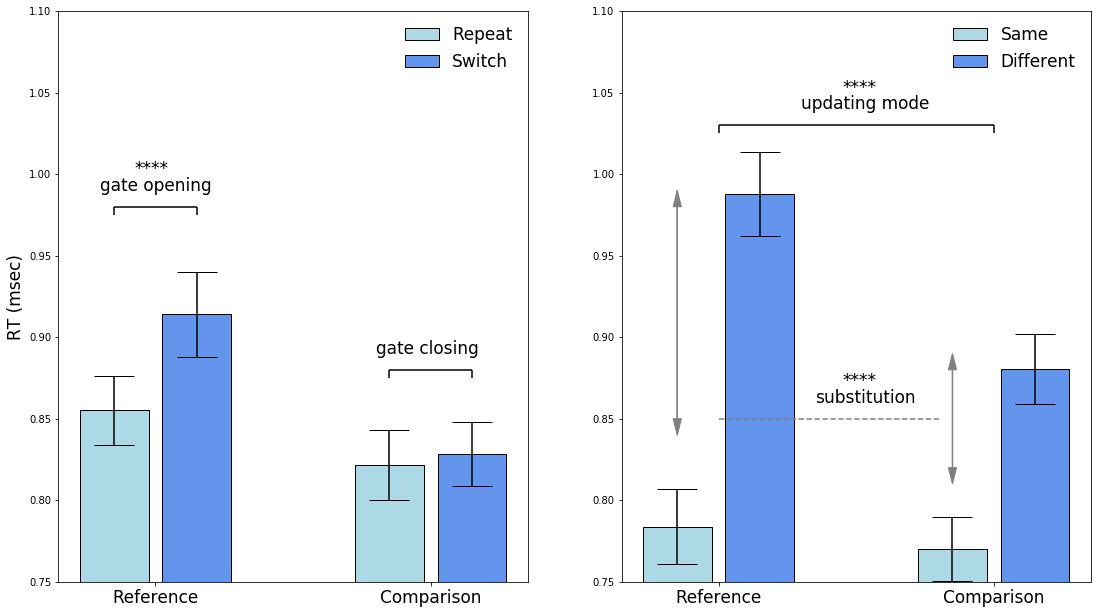

In [94]:
from matplotlib.pyplot import hlines, vlines


fig, ax = plt.subplots(1,2)

# plt.rcParams['figure.figsize'] = [20, 10]
fig.set_size_inches(18.5, 10.5)

barWidth = 0.25
labels = ['Reference', 'Comparison']

r1 = np.arange(len(means_df_plot1[1::2]))
r2 = [x + 0.05 + barWidth for x in r1]

r3 = np.arange(len(means_df_plot2[1::2]))
r4 = [x + 0.05 + barWidth for x in r1]

plt.subplot(1, 2, 1)
plt.bar(r1,means_df_plot1[1::2] , width = barWidth, color = 'lightblue', edgecolor = 'black', yerr=sem_df_plot1[1::2], capsize=20, label= 'Repeat')
plt.bar(r2, means_df_plot1[0::2], width = barWidth, color = 'cornflowerblue', edgecolor = 'black', yerr=sem_df_plot1[0::2], capsize=20, label= 'Switch')

plt.text(x=.075, y= 1, s = asterisks[0], fontsize=17)
plt.text(x= -.05, y= .99, s = 'gate opening', fontsize=17)

plt.hlines(y=0.98, xmin = 0 , xmax = .3,  color='k')
plt.vlines(x=0, ymin = 0.975 , ymax = 0.98,  color='k')
plt.vlines(x=.3, ymin = 0.975 , ymax = .98,  color='k')

#
#plt.text(x=1.1, y= 0.9, s = asterisks[1], fontsize=17)
plt.text(x=0.95, y= 0.89, s = 'gate closing', fontsize=17)
plt.hlines(y=0.88, xmin = 1 , xmax = 1.3,  color='k')
plt.vlines(x=1, ymin = 0.875 , ymax = 0.88,  color='k')
plt.vlines(x=1.3, ymin = 0.875 , ymax = .88,  color='k')


x_pos = (0.15, 1.15)
plt.ylabel('RT (msec)', fontsize=17)
plt.xticks(x_pos, labels= labels, fontsize = 17)
plt.ylim(0.75,1.1)
plt.legend(fontsize =17, frameon = False)


plt.subplot(1, 2, 2)
plt.bar(r3,means_df_plot2[0::2] , width = barWidth, color = 'lightblue', edgecolor = 'black', yerr=sem_df_plot2[0::2], capsize=20, label= 'Same')
plt.bar(r4, means_df_plot2[1::2], width = barWidth, color = 'cornflowerblue', edgecolor = 'black', yerr=sem_df_plot2[1::2], capsize=20, label= 'Different')
plt.text(x=.6, y= 1.05, s = asterisks[2], fontsize=17)
plt.text(x=0.45, y= 1.04, s = 'updating mode', fontsize=17)

# plt.plot([0.15, 1.02], [1.15, 1.02])
plt.hlines(y=1.03, xmin = 0.15 , xmax = 1.15,  color='k')
plt.vlines(x=0.15, ymin = 1.025 , ymax = 1.03,  color='k')
plt.vlines(x=1.15, ymin = 1.025 , ymax = 1.03,  color='k')

plt.arrow(x=0, y= 0.99, dx=0 ,dy = -0.15, head_width = 0.03, head_length=0.01, length_includes_head = True, color='grey')
plt.arrow(x=0, y= 0.84, dx=0 ,dy = 0.15, head_width = 0.03, head_length=0.01, length_includes_head = True, color='grey')



plt.text(x=0.6, y= 0.87, s = asterisks[3], fontsize=17)
plt.text(x=0.5, y= 0.86, s = 'substitution', fontsize=17)
plt.hlines(y=.85, xmin = 0.15 , xmax = 0.95,  color='grey', linestyle ='dashed')
plt.arrow(x=1, y= 0.88, dx=0 ,dy = -0.07, head_width = 0.03, head_length=0.01, length_includes_head = True, color='grey')
plt.arrow(x=1, y= 0.82, dx=0 ,dy = 0.07, head_width = 0.03, head_length=0.01, length_includes_head = True, color='grey')

x_pos = (0.15, 1.15)
plt.xticks(x_pos, labels= labels,  fontsize = 17)
plt.ylim(0.75,1.1)
plt.legend(fontsize =17, frameon = False)

#plt.savefig('../Trondheim_fMRI_data/derivatives/behavior/RT_contrasts_N35.png', dpi=100)

plt.show()


    *** note: barplots do not contain error trials! 
    
    ANOVAS and linear mixed model analysis are excluding errors though!!!

### see JASP outpout for checking for mixed and random effects using the linear mixed models (lmer) 
also for accuracy


In [ ]:
data[['correct', 'sub']].groupby('sub').mean()